In [12]:
%matplotlib inline
!pip install geopy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from iqx import *
import geopy.distance
# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx
from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit.optimization.applications.ising import max_cut, tsp
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua import aqua_globals
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit.optimization.problems import QuadraticProgram
# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

In [13]:
# List of airports

airports = [["Toronto Pearson International Airport", (43.6777, 79.6248)],
            ["Boston Logan International Airport", (42.3656, 71.0096)],
            ["Singapore Changi Airport", (1.3644, 103.9915)]]

# ["San Francisco International Airport", (37.6213, 122.3790)], ["Paris Charles de Gaulle Airport", (49.0097, 2.5480)], ["Melbourne Airport", (37.6690, 144.8410)]

In [14]:
# Distance matrix (numbers are direct distance)

dist_matrix = np.zeros((len(airports), len(airports)))
for i in range(len(airports)):
    for j in range(len(airports)):
        if i != j:
            dist_matrix[i][j] = geopy.distance.distance(airports[i][1], airports[j][1]).km

print(dist_matrix)

[[   0.          716.85757295 5272.18540098]
 [ 716.85757295    0.         5607.59350641]
 [5272.18540098 5607.59350641    0.        ]]


{0: array([1.        , 0.10529191]), 1: array([-0.54699209, -0.87409607]), 2: array([-0.45300791,  0.76880415])}


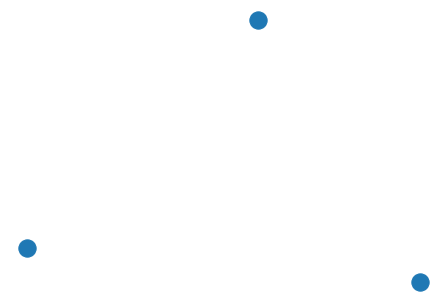

In [15]:
nodes = len(airports)
num_qubits = nodes**2

graph = nx.Graph(node_color = "red", alpha = 0.1)
nodes = len(airports)
for node in range(nodes):
    graph.add_node(node)
pos = nx.spring_layout(graph)

nx.draw(graph)
print(pos)

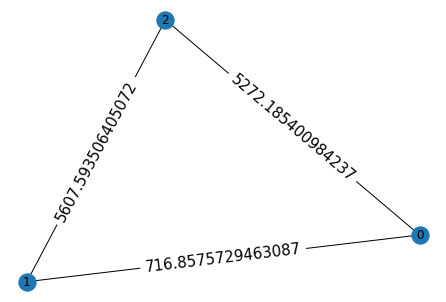

In [16]:
graph = nx.Graph()
ins = tsp.random_tsp(nodes, seed=123)

labels = {}
for i in range(len(dist_matrix)):
    for j in range(len(dist_matrix)-(i+1)):
        graph.add_edge(i,i+j+1)
        labels[ (i,i+j+1) ] = str(dist_matrix[i][i+j+1])

pos=nx.spring_layout(graph)

nx.draw(graph, pos)
nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels,font_size=15)
nx.draw_networkx_labels(graph,pos=pos)

import pylab as plt
plt.show()

In [17]:
# Mapping to Ising
qubitOp, offset = tsp.get_operator(ins)
print('Offset:', offset)
print('Ising Hamiltonian:')
print(qubitOp.print_details())

Offset: 600303.0
Ising Hamiltonian:
IIIIIIIIZ	(-100069.5+0j)
IIIIZIIII	(-100055.5+0j)
IIIIZIIIZ	(12+0j)
IIIIIIIZI	(-100069.5+0j)
IIIZIIIII	(-100055.5+0j)
IIIZIIIZI	(12+0j)
IIIIIIZII	(-100069.5+0j)
IIIIIZIII	(-100055.5+0j)
IIIIIZZII	(12+0j)
IZIIIIIII	(-100077+0j)
IZIIIIIIZ	(22.75+0j)
ZIIIIIIII	(-100077+0j)
ZIIIIIIZI	(22.75+0j)
IIZIIIIII	(-100077+0j)
IIZIIIZII	(22.75+0j)
IIIIIZIZI	(12+0j)
IIIIZIZII	(12+0j)
IIIZIIIIZ	(12+0j)
IZIIIZIII	(15.75+0j)
ZIIIZIIII	(15.75+0j)
IIZZIIIII	(15.75+0j)
IIZIIIIZI	(22.75+0j)
IZIIIIZII	(22.75+0j)
ZIIIIIIIZ	(22.75+0j)
IIZIZIIII	(15.75+0j)
IZIZIIIII	(15.75+0j)
ZIIIIZIII	(15.75+0j)
IIIIIZIIZ	(50000+0j)
IIZIIIIIZ	(50000+0j)
IIZIIZIII	(50000+0j)
IIIIZIIZI	(50000+0j)
IZIIIIIZI	(50000+0j)
IZIIZIIII	(50000+0j)
IIIZIIZII	(50000+0j)
ZIIIIIZII	(50000+0j)
ZIIZIIIII	(50000+0j)
IIIIIIIZZ	(50000+0j)
IIIIIIZIZ	(50000+0j)
IIIIIIZZI	(50000+0j)
IIIIZZIII	(50000+0j)
IIIZIZIII	(50000+0j)
IIIZZIIII	(50000+0j)
IZZIIIIII	(50000+0j)
ZIZIIIIII	(50000+0j)
ZZIIIIIII	(50000+0j)



/opt/conda/lib/python3.8/site-packages/qiskit/optimization/applications/ising/tsp.py:140: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  zero = np.zeros(num_qubits, dtype=np.bool)
/opt/conda/lib/python3.8/site-packages/qiskit/optimization/applications/ising/tsp.py:151: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z_p = np.zeros(num_qubits, dtype=np

In [18]:
qp = QuadraticProgram()
qp.from_ising(qubitOp, offset, linear=True)
qp.to_docplex().prettyprint()

// This file has been generated by DOcplex
// model name is: AnonymousModel
// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;
dvar bool x_5;
dvar bool x_6;
dvar bool x_7;
dvar bool x_8;

minimize
 - 200000 x_0 - 200000 x_1 - 200000 x_2 - 200000 x_3 - 200000 x_4 - 200000 x_5
 - 200000 x_6 - 200000 x_7 - 200000 x_8 [ 200000 x_0*x_1 + 200000 x_0*x_2
 + 200000 x_0*x_3 + 48 x_0*x_4 + 48 x_0*x_5 + 200000 x_0*x_6 + 91 x_0*x_7
 + 91 x_0*x_8 + 200000 x_1*x_2 + 48 x_1*x_3 + 200000 x_1*x_4 + 48 x_1*x_5
 + 91 x_1*x_6 + 200000 x_1*x_7 + 91 x_1*x_8 + 48 x_2*x_3 + 48 x_2*x_4
 + 200000 x_2*x_5 + 91 x_2*x_6 + 91 x_2*x_7 + 200000 x_2*x_8 + 200000 x_3*x_4
 + 200000 x_3*x_5 + 200000 x_3*x_6 + 63 x_3*x_7 + 63 x_3*x_8 + 200000 x_4*x_5
 + 63 x_4*x_6 + 200000 x_4*x_7 + 63 x_4*x_8 + 63 x_5*x_6 + 63 x_5*x_7
 + 200000 x_5*x_8 + 200000 x_6*x_7 + 200000 x_6*x_8 + 200000 x_7*x_8 ] +
 600000;
 
subject to {

}


In [19]:
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result)

optimal function value: 202.0
optimal value: [1. 0. 0. 0. 1. 0. 0. 0. 1.]
status: SUCCESS


/opt/conda/lib/python3.8/site-packages/qiskit/quantum_info/operators/pauli.py:30: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = np.asarray(arr).astype(np.bool)
/opt/conda/lib/python3.8/site-packages/qiskit/quantum_info/operators/pauli.py:30: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = np.asarray(arr).astype(np.bool)
/opt/conda/lib/pyt

In [20]:
aqua_globals.random_seed = np.random.default_rng(123)
seed = 10598
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

In [21]:
spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
vqe = VQE(qubitOp, ry, spsa, quantum_instance=quantum_instance)

result = vqe.run(quantum_instance)

print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
x = sample_most_likely(result.eigenstate)
print('feasible:', tsp.tsp_feasible(x))
z = tsp.get_tsp_solution(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, ins.w))
# draw_tsp_solution(graph, z, colors, pos)

/opt/conda/lib/python3.8/site-packages/qiskit/circuit/register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

energy: -587129.7995590193
time: 10.29103398323059
feasible: True
solution: [1, 2, 0]
solution objective: 202.0


/opt/conda/lib/python3.8/site-packages/qiskit/circuit/register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if not isinstance(key, (int, np.int, np.int32, np.int64, slice, list)):
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/register.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

In [22]:
print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
x = sample_most_likely(result.eigenstate)
print('feasible:', tsp.tsp_feasible(x))
z = tsp.get_tsp_solution(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, ins.w))

energy: -587129.7995590193
time: 10.29103398323059
feasible: True
solution: [1, 2, 0]
solution objective: 202.0
